ДЗ

Взять картинку

1.1 Нарисовать 10 концентрических кругов на ней

1.2 Нарисовать 10 вложенных прямоугольников на ней

2.1 Нарисовать треугольник, в нем вложенный круг, в нем вложенный прямоугольник

2.2 Нарисовать  круг, в нем вложенный прямоугольник, в нем вложенный треугольник

2.3 Нарисовать прямоугольник, в нем вложенный круг, в нем вложенный треугольник

3.1 Выбрать любую картинку и понизить яркость левой половины картинки и повысить яркость в правой половине картинки

3.2 Выбрать любую картинку и понизить контраст верхней половины картинки и повысить контраст в нижней половине картинки

4. Выбрать произвольную картинку и бинаризовать ее наилучшим образом, подобрав порог. 5 Вариантов: 1 -  cv2.THRESH_BINARY, 2 - cv2.THRESH_BINARY_INV, 3 - cv2.
THRESH_TRUNC, 4 -  cv2.THRESH_TOZERO, 5 - cv2.THRESH_TOZERO_INV. Номер варианта : номер первой буквы Фамилии % 5 + 1

5. Повторить то же самое, только с адаптивным порогом. 2 варианта : 1 - THRESH_BINARY_INV, 2 - THRESH_BINARY. Номер варианта : номер первой буквы Фамилии % 2 + 1

In [72]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from math import cos, sin, pi, sqrt

In [73]:
img = cv2.imread("New_Zealand_Coast.jpg", 1)
print(img.shape)

(600, 840, 3)


# 1.1


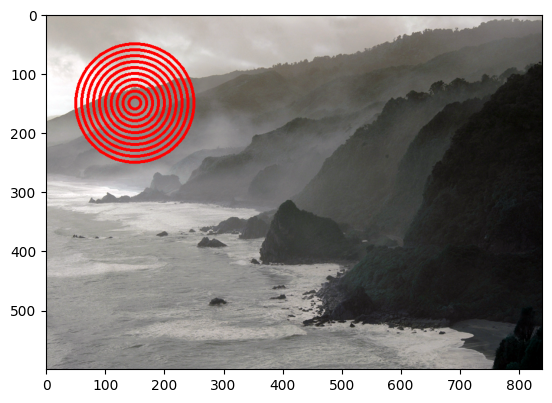

In [74]:
img_conc_circ=img.copy()
for i in range(10, 110, 10):
    cv2.circle(img_conc_circ, (150, 150), i, (255, 0, 0), 3)
plt.imshow(img_conc_circ)

# 1.2

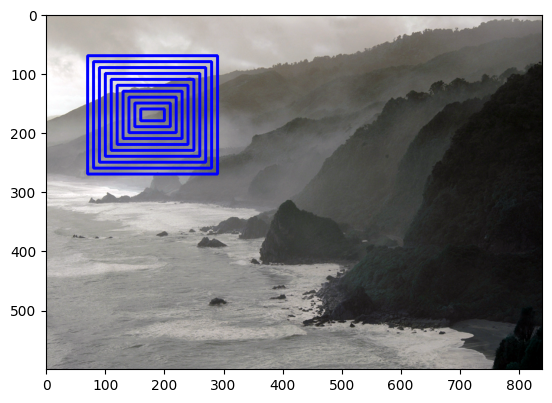

In [75]:
img_conc_rect = img.copy()
for i in range(0, 100, 10):
    cv2.rectangle(img_conc_rect, (160-i, 160-i), (200+i, 180+i), (0, 0, 255), 3)
plt.imshow(img_conc_rect)

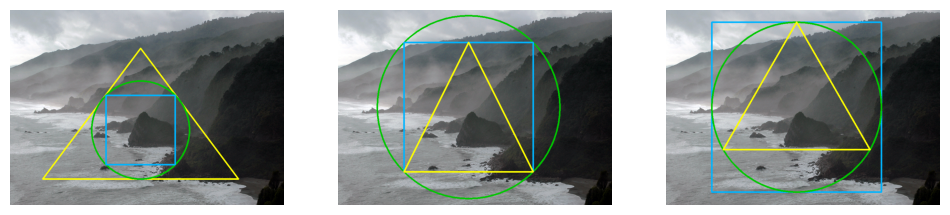

In [76]:
img1 = img.copy()
pts1 = np.array([[100,520],[700,520],[400,120]], np.int32).reshape(-1,1,2)
cv2.polylines(img1,[pts1],True,(0,255,255),3)
cv2.circle(img1,(400,370),150,(0,200,0),3)
cv2.rectangle(img1,(294,264),(506,476),(255,180,0),3)

img2 = img.copy()
cv2.circle(img2,(400,300),280,(0,200,0),3)
cv2.rectangle(img2,(202,102),(598,498),(255,180,0),3)
pts2 = np.array([[202,498],[598,498],[400,102]], np.int32).reshape(-1,1,2)
cv2.polylines(img2,[pts2],True,(0,255,255),3)

img3 = img.copy()
cv2.rectangle(img3,(140,40),(660,560),(255,180,0),3)
cv2.circle(img3,(400,300),260,(0,200,0),3)
pts3 = np.array([[400,40],[175,430],[625,430]], np.int32).reshape(-1,1,2)
cv2.polylines(img3,[pts3],True,(0,255,255),3)

plt.figure(figsize=(12,4))
for i, im in enumerate([img1,img2,img3],1):
    plt.subplot(1,3,i)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.axis("off")
plt.show()


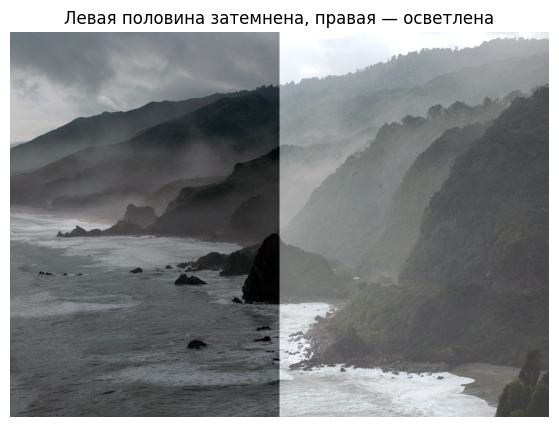

In [77]:
h, w = img.shape[:2]
m = w // 2

res = img.copy()
res[:, :m] = cv2.convertScaleAbs(res[:, :m], alpha=1.0, beta=-60)
res[:, m:] = cv2.convertScaleAbs(res[:, m:], alpha=1.0, beta=60)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.title("Левая половина затемнена, правая — осветлена")
plt.axis("off")
plt.show()

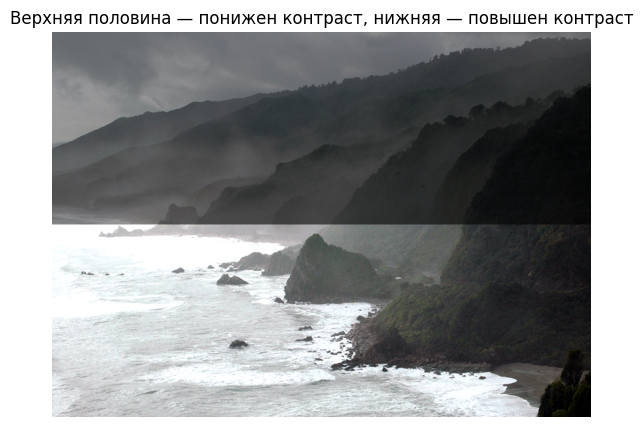

In [78]:
h, w = img.shape[:2]
m = h // 2

res = img.copy()
res[:m] = cv2.convertScaleAbs(res[:m], alpha=0.6, beta=0)
res[m:] = cv2.convertScaleAbs(res[m:], alpha=1.5, beta=0)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.title("Верхняя половина — понижен контраст, нижняя — повышен контраст")
plt.axis("off")
plt.show()

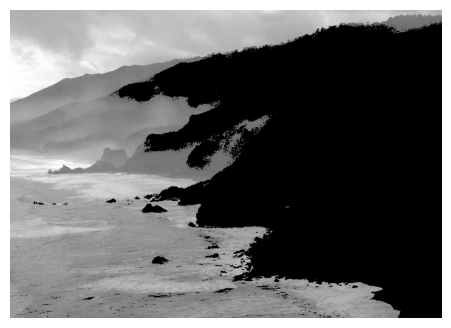

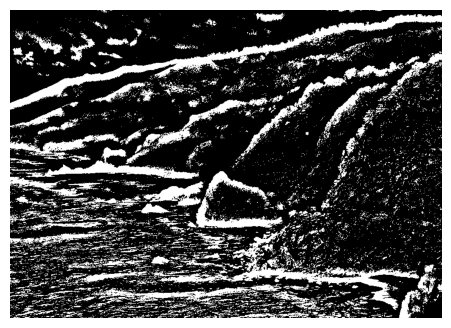

In [79]:
h, w = img.shape[:2]

img_b = img.copy()
m = w // 2
img_b[:, :m] = cv2.convertScaleAbs(img_b[:, :m], alpha=1.0, beta=-60)
img_b[:, m:] = cv2.convertScaleAbs(img_b[:, m:], alpha=1.0, beta=60)

img_c = img.copy()
mh = h // 2
img_c[:mh] = cv2.convertScaleAbs(img_c[:mh], alpha=0.7, beta=0)
img_c[mh:] = cv2.convertScaleAbs(img_c[mh:], alpha=1.4, beta=0)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
t, _ = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, tozero = cv2.threshold(gray, int(t), 255, cv2.THRESH_TOZERO)

adaptive = cv2.adaptiveThreshold(
    gray, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY_INV,
    31, 5
)

plt.figure(figsize=(6,4))
plt.imshow(tozero, cmap="gray"); plt.axis("off")
plt.show()

plt.figure(figsize=(6,4))
plt.imshow(adaptive, cmap="gray"); plt.axis("off")
plt.show()